# US Accidents Exploratory Data Analysis

We're working with a dataset from kaggle called us_accidents.csv

In [1]:
# We'll need to import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./US_Accidents_Dec20_updated.csv')
df.head(5)
len(df)

1516064

## Data cleaning and preparation

In [3]:
# I want to take a look at the columns we have to work with
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Let's see the types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.select_dtypes(['float','int32','int64']).columns  # Select columns where the data type is in the array
len(df.select_dtypes(['float','int32','int64']).columns)

14

From the data set, there are 14 numeric columns

In [6]:
df.isna().sum()  # This returns the number of null values for each column

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [7]:
number_of_na = df.isna().sum().sort_values(ascending=False)

<AxesSubplot:>

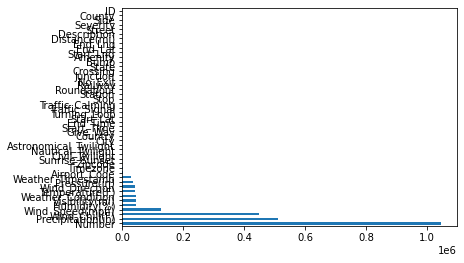

In [8]:
number_of_na.plot(kind='barh')

The plot is a little messy. We could remove the columns that have 0 missing data

<AxesSubplot:>

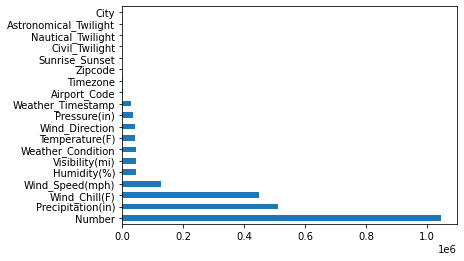

In [9]:
number_of_na[number_of_na > 0].plot(kind='barh')

I'd like to find the percentage of data that is missing relative to the total data entries

In [10]:
np.round((number_of_na / len(df)) * 100)

Number                   69.0
Precipitation(in)        34.0
Wind_Chill(F)            30.0
Wind_Speed(mph)           8.0
Humidity(%)               3.0
Visibility(mi)            3.0
Weather_Condition         3.0
Temperature(F)            3.0
Wind_Direction            3.0
Pressure(in)              2.0
Weather_Timestamp         2.0
Airport_Code              0.0
Timezone                  0.0
Zipcode                   0.0
Sunrise_Sunset            0.0
Civil_Twilight            0.0
Nautical_Twilight         0.0
Astronomical_Twilight     0.0
City                      0.0
Country                   0.0
Give_Way                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Turning_Loop              0.0
Traffic_Signal            0.0
Traffic_Calming           0.0
Stop                      0.0
Station                   0.0
Roundabout                0.0
Railway                   0.0
No_Exit                   0.0
Junction                  0.0
Crossing  

From the result, a significant portion of the number column has a lot of missing data. I beleive we can drop that

In [11]:
df.drop(columns='Number',inplace=True,axis=1)

In [12]:
df['Start_Time'].dtype

dtype('O')

The type is a string, we need to convert the time to a valid format to work with

In [13]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [14]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

I want to select the columns that i feel i can extract some information from

<AxesSubplot:>

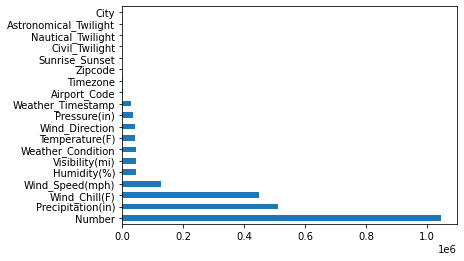

In [15]:
number_of_na[number_of_na > 0].plot(kind='barh')

### Columns i'm concerned with
- City
- Temperature
- Weather_Condition
- Visibility
- Humidity
- Precipitation
- Start_Time
- End_Time
- Bump
- Crossing
- Give_Way
- Junction
- No_Exit
- Railway

In [16]:
# A new dataframe containing the columns i'm concerned with
new_df = df[['Start_Time', 'End_Time','City','State','Country','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Weather_Condition','Visibility(mi)','Humidity(%)','Precipitation(in)',]].copy()

In [17]:
len(new_df.columns)

15

## What city has had the most accident?

### City

In [18]:
new_df['City'].nunique()

10657

The are over 10k cities, we could solve this using a group by

In [19]:
new_df['City'].value_counts()

Los Angeles      39984
Miami            36233
Charlotte        22203
Houston          20843
Dallas           19497
                 ...  
New Lexington        1
Burnett              1
Sumerco              1
Fish Haven           1
West Brooklyn        1
Name: City, Length: 10657, dtype: int64

In [20]:
# I want to get a unique pair of states and city

state_and_city = new_df[['State','City']].values
state_and_city = list(map(lambda x: tuple(x),state_and_city))
state_and_city = set(state_and_city)

In [21]:
# Then I took it back to a dataframe
state_and_city = pd.DataFrame(state_and_city,columns=['State','City'])

In [22]:
accidents_per_city = new_df['City'].value_counts()

In [23]:
accidents_per_city.head()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

Above are the cities with the most accidents recorded

In [24]:
new_df.head()

,Start_Time,End_Time,City,State,Country,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Weather_Condition,Visibility(mi),Humidity(%),Precipitation(in)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,Dublin,OH,US,False,False,False,False,False,False,Light Rain,10.0,58.0,0.00
1,2016-02-08 05:56:20,2016-02-08 11:56:20,Dayton,OH,US,False,False,False,False,False,False,Light Rain,10.0,91.0,0.02
2,2016-02-08 06:15:39,2016-02-08 12:15:39,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
3,2016-02-08 06:15:39,2016-02-08 12:15:39,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
4,2016-02-08 06:51:45,2016-02-08 12:51:45,Akron,OH,US,False,False,False,False,False,False,Overcast,10.0,55.0,NaN


In [25]:
state_city_and_acc = pd.merge(accidents_per_city,state_and_city,left_index=True,right_on='City',).drop(columns=['City_y'],axis=1).reset_index()
state_city_and_acc.rename(columns = {'City_x':'nos accidents'},inplace=True)

In [26]:
state_city_and_acc.drop(columns='index',inplace=True)

I saw that Miami city had more than one state in the dataset, so i'm identifying and dropping them

In [27]:
index = state_city_and_acc.loc[(state_city_and_acc.City=='Miami') & (state_city_and_acc.State != 'FL')].index

In [28]:
state_city_and_acc.drop(index,inplace=True)

In [29]:
state_city_and_acc['City'].value_counts()[state_city_and_acc['City'].value_counts() > 1]

Franklin       20
Springfield    19
Jackson        19
Clinton        19
Greenville     18
               ..
Bella Vista     2
Ripon           2
Rome            2
Deming          2
Snow Hill       2
Name: City, Length: 1995, dtype: int64

Whoa, seems like things are more problematic than i thought, about 2k cities have multiple states. We're going to require another dataset

In [30]:
# url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'
ext_state_and_city = pd.read_csv('./us_cities_states_counties.csv',delimiter='|')
ext_state_and_city = ext_state_and_city[['State short','City']]
len(ext_state_and_city)

63211

In [31]:
# I had to get unique pairs of states and city from the eternal dataset
ext_state_and_city = list(map(lambda x: tuple(x),ext_state_and_city.values))
ext_state_and_city = set(ext_state_and_city)
ext_state_and_city = pd.DataFrame(ext_state_and_city,columns=['State short','City'])

In [32]:
ext_state_and_city

,State short,City
0,LA,Chauvin
1,ME,Cliff Island
2,IN,Carmel
3,OH,Miller City
4,LA,Covington
...,...,...
29856,MT,Paradise
29857,WV,Princeton
29858,LA,Chatham
29859,ND,Maxbass


In [33]:
state_city_and_acc

,City,nos accidents,State
0,Los Angeles,39984,CA
1,Miami,36233,FL
4,Charlotte,22203,TN
5,Charlotte,22203,VT
6,Charlotte,22203,NC
...,...,...,...
15248,New Lexington,1,OH
15249,Burnett,1,WI
15250,Sumerco,1,WV
15251,Fish Haven,1,ID


In [34]:
final_state_city_df = pd.merge(state_city_and_acc,ext_state_and_city, left_on=['City','State'],right_on=['City','State short']).drop('State short',axis=1)

## Which State has the most cities with the top 100 accidents ?

In [35]:
sorted_df = final_state_city_df.sort_values(by='nos accidents',ascending=False)[:100]
sorted_df.groupby(by='State').size().sort_values(ascending=False)

State
OR    7
CA    7
IN    6
IL    6
NC    5
MN    5
FL    4
GA    4
TX    4
MI    4
TN    3
IA    3
KY    3
PA    3
ME    3
AR    3
NY    2
OH    2
NJ    2
MO    2
MS    2
VA    2
CT    2
VT    2
AZ    2
MD    2
UT    1
RI    1
AL    1
OK    1
NV    1
NM    1
LA    1
KS    1
CO    1
WV    1
dtype: int64

From the result above, Los Angeles, Miami, Charlotte, Houston and Dallas has the highest amount of accidents

## Question
1. We could see if population has an impact on the number of accidents
2. What time of the day does most accidents occur


For Los Angeles, what weather did the most accidents occur?

In [36]:
new_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()

Fair                     18075
Clear                     7304
Cloudy                    3173
Partly Cloudy             2699
Mostly Cloudy             2166
Haze                      2008
Overcast                  1438
Light Rain                1111
Scattered Clouds           462
Rain                       346
Heavy Rain                 294
Fog                        262
Smoke                      225
Mist                        26
Fair / Windy                 6
T-Storm                      6
Blowing Dust                 5
Patches of Fog               4
Light Drizzle                4
Heavy T-Storm                3
Shallow Fog                  2
Light Rain / Windy           2
Partly Cloudy / Windy        2
Thunder                      1
Mostly Cloudy / Windy        1
Thunderstorm                 1
Name: Weather_Condition, dtype: int64

From the data above, Most accidents occur Calm weathers than in Harsh weathers

I'd like to visulize the trend on a graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

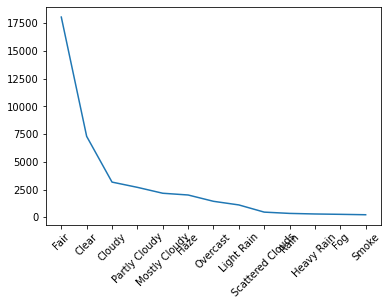

In [37]:
la_acc_weather = new_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()
# la_acc_weather.plot(kind='hist')
plt.plot(la_acc_weather[la_acc_weather > 200])
plt.xticks(rotation=45)
# plt.tight_layout()

<AxesSubplot:>

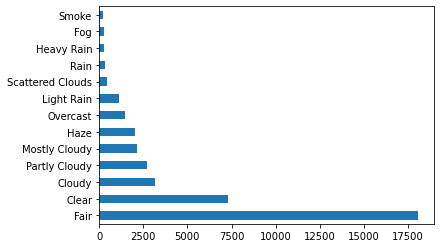

In [38]:
la_acc_weather[la_acc_weather > 100].plot(kind='barh')

The graphs depict the same, the worse the weather, the lower the accidents

Let's see if miami follows the same trend

In [39]:
miami_acc = new_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc

Mostly Cloudy                   9474
Fair                            9109
Partly Cloudy                   5667
Cloudy                          3403
Light Rain                      1825
Clear                           1549
Scattered Clouds                1521
Overcast                         642
Rain                             478
Mostly Cloudy / Windy            401
Thunder                          220
Heavy Rain                       198
Fair / Windy                     190
Thunder in the Vicinity          185
Partly Cloudy / Windy            157
T-Storm                          125
Cloudy / Windy                   120
Fog                              104
Thunderstorm                      74
Light Rain / Windy                68
Light Thunderstorms and Rain      61
Light Rain with Thunder           55
Heavy T-Storm                     50
Haze                              32
Heavy Thunderstorms and Rain      32
Heavy Rain / Windy                19
Thunderstorms and Rain            18
R

<AxesSubplot:>

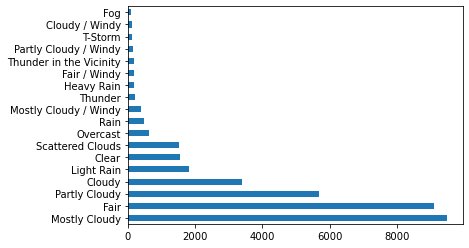

In [40]:
miami_acc = new_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc[miami_acc > 100].plot(kind='barh')

A similar trend seems to take place in miami, with this we can conclude that most people as less likely to go out when the wether is bad, than when the weather is clear.

Based on the information above, i'd like to see the relation between accidents and Traffic

In [41]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

From the columns in the data, we don't have the number of traffic, but we do have a traffic_calming column

In [42]:
with pd.option_context('display.max_rows',None):
    display(df.sample(100)) # display is a better alternative to print(), in order to preseve table styles

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1467082,A-4190425,4,2019-05-28 15:27:05,2019-05-28 15:55:46,32.996512,-83.558626,33.002230,-83.550047,0.635,Closed between Clinton Xing Dr and Park Place ...,...,False,False,False,False,False,False,Day,Day,Day,Day
570193,A-3291528,2,2020-10-20 12:57:48,2020-10-21 02:15:56,28.419187,-81.404635,28.421327,-81.405369,0.154,Queuing traffic on US-92 E - US-17 N - US-441 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
21201,A-2737801,4,2016-11-26 16:42:02,2016-11-26 22:42:02,30.366399,-91.634320,30.343512,-91.718679,5.272,Closed at LA-3177/Exit 121 - Road closed due t...,...,False,False,False,False,False,False,Day,Day,Day,Day
296081,A-3013548,2,2020-11-26 00:47:00,2020-11-26 03:08:57,34.139939,-118.370172,34.140462,-118.370156,0.036,Incident on VINELAND AVE near VENTURA BLVD Rig...,...,False,False,False,False,False,False,Night,Night,Night,Night
131856,A-2848456,3,2016-10-17 08:59:38,2016-10-17 14:59:38,33.853750,-117.963220,33.853920,-117.954430,0.505,At Brookhurst St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
10021,A-2726621,4,2016-05-25 11:41:13,2016-05-25 17:41:13,33.695800,-117.908015,33.695660,-117.919590,0.665,Closed at Susan St - Road closed due to accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1087857,A-3811195,2,2019-10-19 19:36:00,2019-10-19 20:47:35,33.978768,-118.391939,33.978768,-118.391939,0.000,At Howard Hughes Pky/Exit 49A - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
892053,A-3615354,1,2020-04-02 13:06:06,2020-04-02 13:51:06,32.250630,-110.909700,32.250630,-110.909700,0.000,At N Alvernon Way - Accident investigation work.,...,False,False,False,False,True,False,Day,Day,Day,Day
277252,A-2994439,2,2020-11-22 00:22:00,2020-11-22 03:22:46,36.869517,-121.732812,36.870276,-121.732905,0.053,OCCD ELKHORN/HALL NEAR FIRE STATION,...,False,False,False,False,False,False,Night,Night,Night,Night
292971,A-3010393,2,2020-11-29 23:03:00,2020-11-30 01:25:57,30.357322,-97.617862,30.356548,-97.618553,0.068,Incident on GAELIC DR near MAGNUS ST Drive wit...,...,False,False,False,False,False,False,Night,Night,Night,Night


From the table above, we that none of the records have Traffic_Calming set to True, so i checked the percentage

In [43]:
(df.Traffic_Calming.value_counts() / len(df))*100

False    99.967745
True      0.032255
Name: Traffic_Calming, dtype: float64

And from what i see, the Traffic_Calming is False 99% of the time

I couldn't find any information online to validate the results

Which months year had the highest accidents

In [44]:
# new_df.groupby(by = new_df['Start_Time'].dt.year).count()
new_df['Start_Time'].dt.year.value_counts()

2020    787932
2019    261772
2017    170099
2018    166936
2016    129325
Name: Start_Time, dtype: int64

I want to verify how accurate the data is by seeing how many days are in each year

In [45]:
dates = pd.Series(new_df['Start_Time'].dt.date.unique(),dtype='datetime64[ns]')

In [46]:
dates.groupby(by =dates.dt.year).count()

2016    322
2017    365
2018    365
2019    363
2020    319
dtype: int64

<AxesSubplot:>

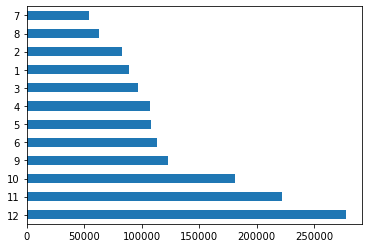

In [47]:
new_df['Start_Time'].dt.month.value_counts().plot(kind='barh')

In [48]:
((new_df.isna().sum()) / len(new_df))*100

Start_Time            0.000000
End_Time              0.000000
City                  0.005475
State                 0.000000
Country               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Weather_Condition     2.902714
Visibility(mi)        2.916170
Humidity(%)           3.001786
Precipitation(in)    33.675953
dtype: float64

## Questions to answer
1. What the is average duration of accidents
2. What is the highest duration of an accident
3. Which state has the higest accident
4. What was the weather condition at most of the accident
5. What time of the day did the accidents occur
6. What are the percentage of occurence of severe accidents
7. Where to accidents occur mostly ('Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway')